## Plot WordCloud


In [1]:
#open libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
https://towardsdatascience.com/can-we-predict-rotten-tomatoes-ratings-8b5f5b7d7eff

In [119]:
movies =  pd.read_csv('https://raw.githubusercontent.com/idc9/stor390/master/data/movies.csv')

In [123]:
movies.thtr_rel_year.describe()

count     651.000000
mean     1997.941628
std        10.974501
min      1970.000000
25%      1990.000000
50%      2000.000000
75%      2007.000000
max      2014.000000
Name: thtr_rel_year, dtype: float64

In [120]:
movies.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [121]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             651 non-null    object 
 1   title_type        651 non-null    object 
 2   genre             651 non-null    object 
 3   runtime           650 non-null    float64
 4   mpaa_rating       651 non-null    object 
 5   studio            643 non-null    object 
 6   thtr_rel_year     651 non-null    float64
 7   thtr_rel_month    651 non-null    float64
 8   thtr_rel_day      651 non-null    float64
 9   dvd_rel_year      643 non-null    float64
 10  dvd_rel_month     643 non-null    float64
 11  dvd_rel_day       643 non-null    float64
 12  imdb_rating       651 non-null    float64
 13  imdb_num_votes    651 non-null    int64  
 14  critics_rating    651 non-null    object 
 15  critics_score     651 non-null    float64
 16  audience_rating   651 non-null    object 
 1

In [17]:
# open df
df_rt = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/rt_movie_info.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [18]:
# print 4 first rows 
df_rt.head()

,movie_link,movie_name,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,audience_fresh_top_critics_count,audience_rotten_rotten_critics_count,tomatometer_avg_rating,audience_top_critics_avg_rating,score_sentiment,audience_avg_rating
0,/m/312291718,Tillie's Punctured Romance,NR,"Classics,Comedy","Charles Bennett,Mack Sennett",Hampton Del Ruth,"This Keystone comedy, Charlie Chaplin's 33rd, ...",https://resizing.flixster.com/2cfo_iZmt1DetxOR...,"Charles Chaplin,Marie Dressler,Mabel Normand,C...","Jan 1, 1914",...,972.0,1,5,1,1,0,6.38,0.0,NEGATIVE,3.21
1,/m/770681144,Tango Tangles,NR,Comedy,Mack Sennett,Mack Sennett,Tango Tangles is an impromptu Keystone comedy ...,https://resizing.flixster.com/AJKmCcDUQqEOdT3n...,"Glen Cavender,Charles Chaplin,Edgar Kennedy,Fr...","Mar 9, 1914",...,183.0,0,0,0,0,0,0.00,0.0,NEGATIVE,2.65
2,/m/20297,Cabiria,NR,"Art House & International,Classics,Drama",Giovanni Pastrone,Gabriele D'Annunzio,The ancient conflict between Rome and Carthage...,https://resizing.flixster.com/NA4TdKSRbmLNhJKw...,"Alex Bernard,Italia Almirante-Manzini,Lidia Qu...","Jun 1, 1914",...,1153.0,4,8,1,4,0,7.75,10.0,POSITIVE,3.70
3,/m/770680394,The Magic Cloak of Oz,NR,"Action & Adventure,Drama,Kids & Family,Science...",J. Farrell MacDonald,L. Frank Baum,Author L. Frank Baum adapts his own original s...,https://resizing.flixster.com/qgZlce0CF5nUrmUX...,"Violet MacMillan,Vivian Reed,Mildred Harris,Fr...","Sep 28, 1914",...,NaN,0,0,0,0,0,0.00,0.0,NaN,NaN
4,/m/21368,Regeneration,NR,"Classics,Drama",Raoul Walsh,"Raoul Walsh,Carl Harbaugh",Noteworthy as the first ever feature-length cr...,https://resizing.flixster.com/1aKm46hSGRdsc_Fs...,"Rockliffe Fellowes,Anna Q. Nilsson,William She...","Sep 13, 1915",...,401.0,2,5,0,2,0,9.17,0.0,POSITIVE,3.50


In [4]:
# print info about 
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   movie_link                            13001 non-null  object 
 1   movie_name                            13001 non-null  object 
 2   rating                                13001 non-null  object 
 3   genre                                 12965 non-null  object 
 4   directors                             12679 non-null  object 
 5   writers                               11184 non-null  object 
 6   movie_info                            12507 non-null  object 
 7   poster_image                          13001 non-null  object 
 8   casts                                 12694 non-null  object 
 9   in_theaters_date                      11165 non-null  object 
 10  on_streaming_date                     10646 non-null  object 
 11  runtime_in_minu

#### in_theaters_date

In [25]:
# convert to date format

## convert to date
df_rt['in_theaters_date'] = df_rt.in_theaters_date.astype('datetime64')

## get only the year
df_rt['date_year'] = df_rt.in_theaters_date.dt.year

## get only the month
df_rt['date_month'] = df_rt.in_theaters_date.dt.month

#filter date_year >= 2010
df_rt2 = df_rt[df_rt.date_year > 2010]

In [29]:
print("Now the dataset has:" df_rt2.shape[0] "movies")

SyntaxError: invalid syntax (<ipython-input-29-ed3ae0dd526c>, line 1)

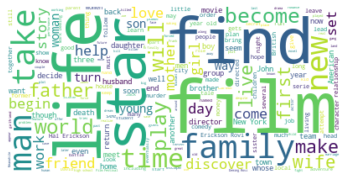

In [115]:
# plot the most frequent words in the movies
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combine multiple rows into one object
text = df_rt['movie_info'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine"])


# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("rotten.png")
#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

In [39]:
df_akas = pd.read_csv('title.akas.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t')

C:\Users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [34]:
df = pd.read_csv('title.principals.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t')

In [36]:
df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [57]:
df_basics = pd.read_csv('title.basics.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t', na_values = 'nan')

C:\Users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
df_ratings = pd.read_csv('title.ratings.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t', na_values = 'nan')

In [117]:
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1616
1,tt0000002,6.0,197
2,tt0000003,6.5,1297
3,tt0000004,6.1,121
4,tt0000005,6.1,2075


In [59]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834111 entries, 0 to 6834110
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int64 
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 469.3+ MB


In [70]:
df_basics.startYear.value_counts()

\N      515481
2017    364283
2018    359042
2016    349903
2015    334330
         ...  
1988         1
1987         1
1985         1
1980         1
1878         1
Name: startYear, Length: 252, dtype: int64

In [69]:
# filter starYear >= 2010
df_basics.startYear = df_basics.startYear.replace(\N,nan)
df_basics.startYear = df_basics['startYear'].astype(np.float)
df_ba = df_basics[df_basics.startYear >= 2010]

SyntaxError: unexpected character after line continuation character (<ipython-input-69-f3f288b253e0>, line 2)

In [78]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834111 entries, 0 to 6834110
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   movie_name      object
 4   isAdult         int64 
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 469.3+ MB


In [74]:
df_basics.columns = ['tconst', 'titleType', 'primaryTitle', 'movie_name', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres']

In [106]:
df2 = df_rt2.merge(df_basics, on = 'movie_name', how = 'left')

In [93]:
df_rt2.shape

(1540, 33)

In [94]:
df_basics.shape

(6834111, 9)

In [95]:
df2.shape

(12260, 41)

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12260 entries, 0 to 12259
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   movie_link                            12260 non-null  object        
 1   movie_name                            12260 non-null  object        
 2   rating                                12260 non-null  object        
 3   genre                                 12260 non-null  object        
 4   directors                             12183 non-null  object        
 5   writers                               11617 non-null  object        
 6   movie_info                            12222 non-null  object        
 7   poster_image                          12260 non-null  object        
 8   casts                                 12105 non-null  object        
 9   in_theaters_date                      12260 non-null  datetime64[ns]
 10

In [97]:
df2.tconst.value_counts()

tt1576055     6
tt6605000     6
tt0762649     6
tt10908184    6
tt1588193     6
             ..
tt1605772     1
tt4094456     1
tt2419072     1
tt8638348     1
tt2899232     1
Name: tconst, Length: 11002, dtype: int64

In [124]:
df2 = df2.drop_duplicates(subset ='tconst', keep = 'first') 
df2 = df2.drop_duplicates(subset ='movie_info', keep = 'first') 

In [125]:
df2.shape

(1275, 41)

#### movie_info

In [126]:
df2.movie_info

0        Silviu has only two weeks left before his rele...
2        Soon after a rising young singer-songwriter (H...
4        Based on Mordecai Richler's award winning nove...
6        Vince Vaughn and Kevin James headline an all-s...
26       Mysterious events surround two travelers, pres...
                               ...                        
11976    THE GENTLEMEN follows American expat Mickey Pe...
11986    Eve follows two actresses fighting for the cov...
12060    In "Onward," teenage elf brothers Ian and Barl...
12075    Tokyo Godfathers, the acclaimed holiday classi...
12078    They say you can never escape a mother's love....
Name: movie_info, Length: 1275, dtype: object

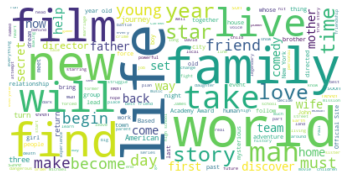

In [127]:
# plot the most frequent words in the movies
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combine multiple rows into one object
text = df2['movie_info'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine"])


# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("rotten2.png")
#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python